In [2]:
# charger les données
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# créer la matrice de données
X = data.as_matrix(data.columns[:-1])

# créer le vecteur d'étiquettes
y = data.as_matrix([data.columns[-1]])
y = y.flatten()

# créer un jeu d'entrainement et un jeu de test (30% des données)
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)                               

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [7]:
from sklearn import kernel_ridge
regressor = kernel_ridge.KernelRidge(kernel='rbf', gamma=0.01)
regressor.fit(X_train_std, y_train)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=0.01, kernel='rbf',
      kernel_params=None)

In [8]:
y_test_pred = regressor.predict(X_test_std)

In [11]:
from sklearn import metrics
import numpy as np
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

In [13]:
print("RMSE = %0.2f" %rmse)

RMSE = 0.71


In [26]:
y_test_pred_int = (np.rint(y_test_pred)).astype(int)

In [27]:
sizes = {}
for i,j in zip(y_test,y_test_pred_int):
    if (i,j) in sizes.keys():
        sizes[(i,j)] += 1
    else:
        sizes[(i,j)] = 1

In [35]:
sizes

{(7, 6): 192,
 (6, 6): 531,
 (6, 5): 91,
 (6, 7): 52,
 (5, 6): 220,
 (7, 7): 77,
 (5, 5): 179,
 (8, 7): 19,
 (4, 5): 37,
 (4, 4): 5,
 (3, 1): 1,
 (8, 6): 27,
 (6, 4): 3,
 (3, 6): 2,
 (4, 6): 15,
 (5, 4): 5,
 (8, 5): 1,
 (5, 7): 5,
 (9, 7): 3,
 (7, 5): 3,
 (9, 6): 1,
 (3, 4): 1}

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


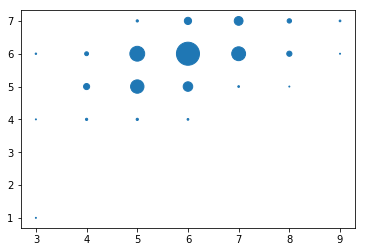

In [34]:
plt.scatter([k[0] for k in sizes.keys()], [k[1] for k in sizes.keys()], [sizes[k] for k in sizes.keys()])

In [46]:
param_grid = {"gamma":np.logspace(-2,1,4),"alpha":np.logspace(-2,2,5)}
score="neg_mean_squared_error"
grid = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'),param_grid, scoring=score, n_jobs=-1, cv=5)

In [47]:
grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]), 'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [48]:
grid.best_params_

{'alpha': 0.01, 'gamma': 0.01}

In [51]:
y_test_pred_cv = grid.predict(X_test_std)

In [52]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_cv))

In [53]:
rmse

0.7060212842928575